project3


Group number 6 Baraa Nidal Ghannoum Tom Mantel Mubarik Omar ALi Abdi

Introduction:

Having the ability to predict the foreseeable future in industries related to finance, engineering, and buisness can become a crucial (element) to posess. A mathematical tecnhiqe which allows us to make assumptions on how certain outcomes might play out, only through past information is a vialible tool used in many differents fields. This is the foundation set by the Monte Carlo simulation [1]. In this project we will use Monte Carlo simulation to estimate the volume of a DNA structure in three dimensions. We will also estimate the uncertainty of atoms position in (x, y, z) coordinates. 

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


TOPIC 1: 



task 0: Define simulation box (x,y,z)dimensions

In [21]:


def calculate_dna_bounds(filename="dna_coords.txt"):
    X_min, Y_min, Z_min = np.inf, np.inf, np.inf
    X_max, Y_max, Z_max = -np.inf, -np.inf, -np.inf

    try:
        with open(filename, 'r') as f:
            for line in f:
                parts = line.split()
                if len(parts) >= 4:  # Element + 3 coordinates
                    try:
                        x = float(parts[1])
                        y = float(parts[2])
                        z = float(parts[3])
                        X_min = min(X_min, x)
                        Y_min = min(Y_min, y)
                        Z_min = min(Z_min, z)
                        X_max = max(X_max, x)
                        Y_max = max(Y_max, y)
                        Z_max = max(Z_max, z)
                    except ValueError:
                        continue
    except FileNotFoundError:
        print(f"File {filename} not found.")
        return None

    if X_min == np.inf:
        print("No valid coordinates found in the file.")
        return None

    return (X_min, X_max), (Y_min, Y_max), (Z_min, Z_max)


# Call the function safely
bounds = calculate_dna_bounds()

if bounds is not None:
    (X_min, X_max), (Y_min, Y_max), (Z_min, Z_max) = bounds

    Buffer = 1.0  # Buffer distance in nm

    BOX_X_MIN = X_min - Buffer
    BOX_X_MAX = X_max + Buffer
    BOX_Y_MIN = Y_min - Buffer
    BOX_Y_MAX = Y_max + Buffer
    BOX_Z_MIN = Z_min - Buffer
    BOX_Z_MAX = Z_max + Buffer

    BOX_X_LENGTH = BOX_X_MAX - BOX_X_MIN
    BOX_Y_LENGTH = BOX_Y_MAX - BOX_Y_MIN
    BOX_Z_LENGTH = BOX_Z_MAX - BOX_Z_MIN

    print("Box dimensions:")
    print(f"X: {BOX_X_MIN} to {BOX_X_MAX} (Length: {BOX_X_LENGTH})")
    print(f"Y: {BOX_Y_MIN} to {BOX_Y_MAX} (Length: {BOX_Y_LENGTH})")
    print(f"Z: {BOX_Z_MIN} to {BOX_Z_MAX} (Length: {BOX_Z_LENGTH})")
else:
    print("Cannot calculate box dimensions because DNA coordinates are missing.")


Box dimensions:
X: -49.18074 to -29.77274 (Length: 19.408)
Y: -18.77082 to 3.54218 (Length: 22.313000000000002)
Z: -10.99192 to 10.89708 (Length: 21.889000000000003)


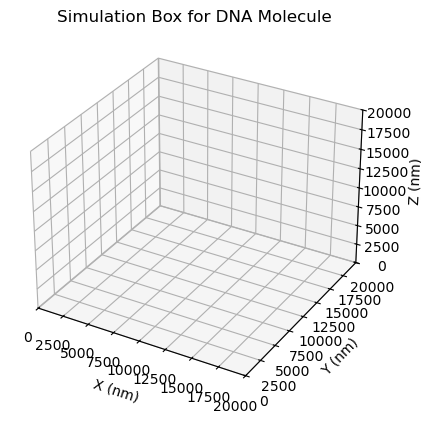

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([BOX_X_MIN, 20000])
ax.set_ylim([BOX_Y_MIN, 20000])
ax.set_zlim([BOX_Z_MIN, 20000])
ax.set_xlabel('X (nm)')
ax.set_ylabel('Y (nm)')
ax.set_zlabel('Z (nm)')
ax.set_title('Simulation Box for DNA Molecule')
plt.show()

Task 1

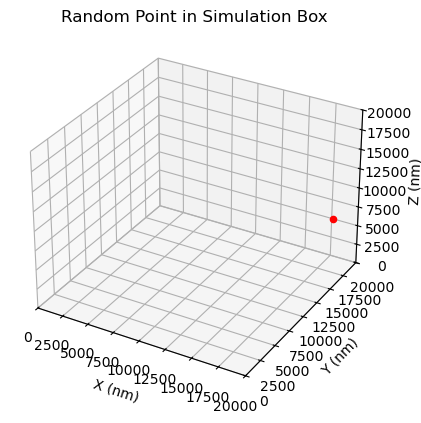

In [ ]:

# Function to generate a single random point in the box
def random_point_in_box():
    x = np.random.uniform(BOX_X_MIN, BOX_X_MAX)
    y = np.random.uniform(BOX_Y_MIN, BOX_Y_MAX)
    z = np.random.uniform(BOX_Z_MIN, BOX_Z_MAX)
    return (x, y, z)

# Generate one random point
point = random_point_in_box()

# Plot the point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(point[0], point[1], point[2], c='r', marker='o')

# Set plot limits
ax.set_xlim([BOX_X_MIN, BOX_X_MAX])
ax.set_ylim([BOX_Y_MIN, BOX_Y_MAX])
ax.set_zlim([BOX_Z_MIN, BOX_Z_MAX])
ax.set_xlabel('X (nm)')
ax.set_ylabel('Y (nm)')
ax.set_zlabel('Z (nm)')
ax.set_title('Random Point in Simulation Box')

plt.show()


Task 2

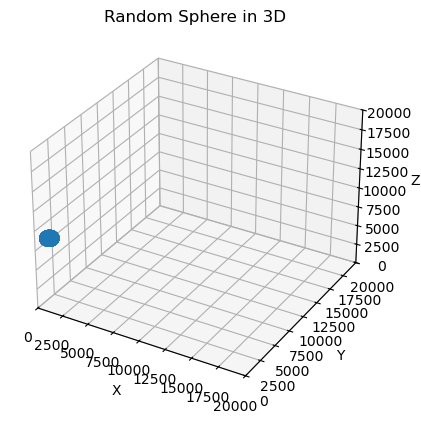

In [ ]:


# Function to generate random spheres
def rand_tall_med_r(amont, low=0, high=20000, r_size=5):
    delta_r = high - low
    r = np.round(np.random.uniform(0, delta_r / r_size, size=amont))

    x, y, z = [], [], []
    for radius in r:
        x.append(np.round(np.random.uniform(low + radius, high - radius)))
        y.append(np.round(np.random.uniform(low + radius, high - radius)))
        z.append(np.round(np.random.uniform(low + radius, high - radius)))

    return np.array([r, x, y, z]).T

# Function to create points for a sphere surface
def plot_sphere(sphere, num_points=100):
    r, cx, cy, cz = sphere[0]
    u = np.linspace(0, 2 * np.pi, num_points)
    v = np.linspace(0, np.pi, num_points)
    x = r * np.outer(np.cos(u), np.sin(v)) + cx
    y = r * np.outer(np.sin(u), np.sin(v)) + cy
    z = r * np.outer(np.ones_like(u), np.cos(v)) + cz
    return x, y, z

# Generate a random sphere
sphere = rand_tall_med_r(1, 0, 10000, 5)
x, y, z = plot_sphere(sphere)

# Flatten arrays for plotting
x = np.squeeze(x).ravel()
y = np.squeeze(y).ravel()
z = np.squeeze(z).ravel()

# Plot in 3D
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.set_xlim(0, 20000)
ax.set_ylim(0, 20000)
ax.set_zlim(0, 20000)

ax.scatter(x, y, z, s=1, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Random Sphere in 3D')

plt.show()


Task 3

In [41]:

def point_in_sphere(point, sphere):
   
    return ((sphere[1] - point[0]) ** 2 +
            (sphere[2] - point[1]) ** 2 +
            (sphere[3] - point[2]) ** 2) < sphere[0] ** 2


def find_points_in_spheres(spheres, points):
   
    x_point, y_point, z_point = [], [], []
    point_in = 0

    for sphere in spheres:
        for point in points:
            if point_in_sphere(point, sphere):
                point_in += 1
                x_point.append(point[0])
                y_point.append(point[1])
                z_point.append(point[2])

    return x_point, y_point, z_point, point_in


# Example usage:
sphere = np.array([[1000, 5000, 5000, 5000]])  # radius 1000, centered at (5000, 5000, 5000)
points = np.random.uniform(0, 20000, size=(1000, 3))  # 1000 random points

x_point, y_point, z_point, point_in = find_points_in_spheres(sphere, points)

print(f"Points inside spheres: {point_in} out of {len(points)} ({point_in / len(points) * 100:.2f}%)")


Points inside spheres: 1 out of 1000 (0.10%)


Task 4


Task 5

Task 6

In [42]:
'''To make the code as crammed as possible, 
we researched into numpy to find possible solutions on how to generate 10 spheres with minimal coding. 
We landed on using the randomizer in uniform standard, 
where we define a minimum radius and a maximum radius, 
with generating n-amount of spheres, which in our case is 10. 
Previously done this task before in a similar way to generate - 
multiple lines in a very small line of code (codewars).'''

n_spheres = 10
r_min, r_max = 0.1, 0.3   # nm

radius_sph = np.random.uniform(r_min, r_max, size=n_spheres)


'''This code should calculate all sphere centers with numpy, without the need of loops.'''
centers = origin + radius_sph[:, None] + (L - 2*radius_sph[:, None]) * np.random.rand(n_spheres, 3)

print("centers:\n", centers)
print("radii:\n", radius_sph)

NameError: name 'origin' is not defined

Task 7


In [43]:
'''In task 7 we define the Monte Carlo function to calculate the fraction of points inside the spheres. 
I first made the formulas sort of by hand, 
and used previous experience from codewars and formula->to->code to implement the numpy code.
After that I researched numpy documentation to find the best functions to use to make the code as efficient as possible.
Which gave me the defined function below.'''

def mc_fraction_in_spheres(centers, radii, origin, L, n_points):
    pts = origin + np.random.rand(n_points, 3) * L  # Here we generate random points in the box         
    diff = pts[:, None, :] - centers[None, :, :]    # Here we calculate the difference vectors         
    dist2 = np.sum(diff**2, axis=2)                 # Here we calculate squared distances         
    inside_any = (dist2 <= radii**2).any(axis=1)    # Here we check if the points are inside any sphere         
    return inside_any.mean()

In [44]:
'''Finally we plot the results from the Monte Carlo simulation.'''

Ns     = np.logspace(3, 6, 8, dtype=int)   # 1e3 ... 1e6 points
fracs  = [mc_fraction_in_spheres(centers, radius_sph, origin, L, N) for N in Ns]

plt.plot(Ns, fracs, marker='o')
plt.xscale('log')
plt.xlabel("Number of random points")
plt.ylabel("Fraction inside 10 spheres")
plt.show()

NameError: name 'centers' is not defined

Task 8


In [45]:
'''Continueing from our test from task 7, we're now using the DNA coordinates file as our data to analyze.
The analyzed atoms will be implemented through functions from numpy to make the code as efficient as possible.
'''

read_file = "dna_coords.txt"

# read: column 0 = symbol (str), columns 1–3 = x,y,z (float), in Å
data    = np.genfromtxt(read_file, dtype=None, encoding=None)
symbols = data[:, 0]
xyz_A   = data[:, 1:4].astype(float)

# Å -> nm
xyz_nm  = xyz_A / 10.0

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [46]:
'''In this small code we the create a dictionary containing the covalent radiuses of the atoms.'''

r_pm = {   # picometers, sets the radiuses for the different atoms.
    "H": 120,
    "C": 170,
    "N": 155,
    "O": 152,
    "P": 180,
}

r_nm = np.array([r_pm[s] for s in symbols]) * 1e-4   # loops through every symbol in our symbols.

NameError: name 'symbols' is not defined

Task 9

In [47]:
margin_nm = 0.2 # In nanometers (nm)

mins   = xyz_nm.min(axis=0) - margin_nm #Finding the minimum xyz values in nm
maxs   = xyz_nm.max(axis=0) + margin_nm #Finding the maximum xyz values in nm
origin = mins # Setting the origin to the minimum values minus margin
L      = maxs - mins # Finding the length of each side of the box
Vbox   = np.prod(L) # Finding the volume of the box

NameError: name 'xyz_nm' is not defined

Task 10

In [48]:
'''In task 10 we use the same function as in task 7 using the same monte carlo method, 
but we've now put in the work of the DNA coordinates, instead of using dummy test values. 
Instead of a given box dimension that is randomized, we use a box definition fitting inside the DNA coordinate file.
In the end we'll have a fraction of points inside the DNA structure, instead of points in randomized spheres as done in task 7. '''

def mc_fraction_in_dna(xyz_nm, r_nm, origin, L, n_points):
    pts  = origin + np.random.rand(n_points, 3) * L    
    diff = pts[:, None, :] - xyz_nm[None, :, :]   # instead of using centers, we use the xyz coordinates of the DNA atoms.      
    dist2 = np.sum(diff**2, axis=2)                   
    inside_any = (dist2 <= r_nm**2).any(axis=1)  # instead of radius_sph in task 7, we use given radius r_nm of the DNA atoms.         
    return inside_any.mean()

In [49]:
Ns    = np.logspace(3, 6, 7, dtype=int)   # adjust upper limit if slow
fracs = [mc_fraction_in_dna(xyz_nm, r_nm, origin, L, N) for N in Ns]

plt.plot(Ns, fracs, marker='o')
plt.xscale('log')
plt.xlabel("Number of random points")
plt.ylabel("Fraction inside DNA spheres")
plt.show()

# final DNA volume estimate (using largest N)
V_DNA = fracs[-1] * Vbox
print("Estimated DNA volume (nm^3):", V_DNA)

NameError: name 'xyz_nm' is not defined

Topic 2

To create a function where  a random set of walkers are randomly generated and iniate movement without order, the monte carlo method can be implimented to solve for the position before movement and after movement [3].

Task 1

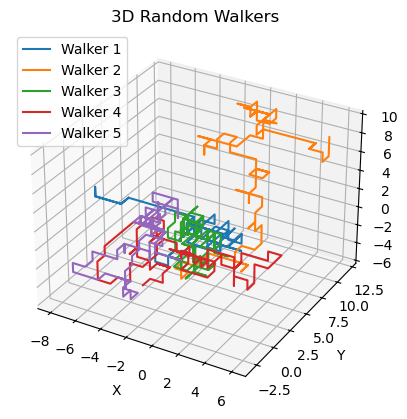

In [50]:
'To make a function of random walkers in 3D space from different positions, we can use the following libraries like numpy for numerical computation and matplotlib for plotting [3].'

import numpy as np
import matplotlib.pyplot as plt

def random_walkers_3d(n_walkers, n_steps):
    # Initialize positions of walkers at the origin
    positions = np.zeros((n_walkers, n_steps, 3))
    
    # Define possible steps in 3D (x, y, z)
    steps = np.array([[1, 0, 0], [-1, 0, 0],
                      [0, 1, 0], [0, -1, 0],
                      [0, 0, 1], [0, 0, -1]])
    
    for i in range(1, n_steps):
        # Randomly choose a step for each walker
        random_steps = steps[np.random.choice(steps.shape[0], n_walkers)]
        positions[:, i, :] = positions[:, i-1, :] + random_steps
    
    return positions

# parameters
n_walkers = 5
n_steps = 100

# plotting the random walkers in 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
positions = random_walkers_3d(n_walkers, n_steps)
for i in range(n_walkers):
    ax.plot(positions[i, :, 0], positions[i, :, 1], positions[i, :, 2], label=f'Walker {i+1}')
ax.set_title('3D Random Walkers')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()



Task 2

<function matplotlib.pyplot.show(close=None, block=None)>

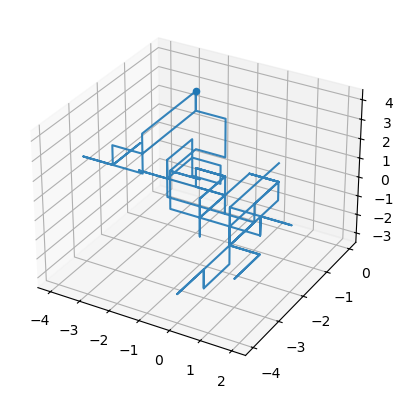

In [51]:
'To make a fast function of random walkers in 3D space we can implement the same method as above but optimize it for speed.'

import numpy as np
import matplotlib.pyplot as plt
import random

def randomwalk3D(n):
    x, y, z = np.zeros(n), np.zeros(n), np.zeros(n) # de

    directions = ["up", "down", "left", "right", "in", "out"] # defining the direction which can be taken in 3d space
    for i in range(1, n):
        step = random.choice(directions)  # randomizing steps taken 
        
        if step == "right":
            x[i] = x[i - 1] + 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1] 
        elif step == "left":
            x[i] = x[i - 1] - 1
            y[i] = y[i - 1] 
            z[i] = z[i - 1]
        elif step == "up":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] + 1
            z[i] = z[i - 1]  
        elif step == "down":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] - 1 
            z[i] = z[i - 1] 
        elif step == "in":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] - 1 
        elif step == "out":
            x[i] = x[i - 1] 
            y[i] = y[i - 1] 
            z[i] = z[i - 1] + 1

    return x, y, z

x_data, y_data, z_data = randomwalk3D(100)

ax = plt.subplot(1, 1, 1, projection='3d')
ax.plot(x_data, y_data, z_data, alpha=0.9)
ax.scatter(x_data[-1], y_data[-1], z_data[-1])

plt.show

Figure above showcases how the optimized version illustrates the random walkers, with 

Task 3

A great methodology which can be implemented for calculating the accessible volume of DNA is to model the DNA structure as a polymer structure using methods like random walker simulation from previous task 1 and 2 of topic 2 [4].


Task 4

The process of calculating the accessible volume of DNA can begin with defining the initial positons of the walkers by giving them randomized starting position. Then the making of discrete set of directions the walkers can make in a three dimensional space like. Up, down, left, right, in, and out. This is done by adding or subracting x, y, and z values by 1. Then the 

Task 5

Self reflection

References

https://www.codewars.com/

https://numpy.org/doc/stable/index.html

[1] amazon, "What is The Monte Carlo Simulation", aws.amazon.com, [Online], Available: https://aws.amazon.com/what-is/monte-carlo-simulation/ (accessed: Nov. 05. 2025)

[2] Medium, "Monte Carlo Simulation in Python", medium.com, [Online], Available: https://medium.com/@whystudying/monte-carlo-simulation-with-python-13e09731d500 (accessed: Nov. 05. 2025)

[3] codingem, "Random Walk in Python (1D, 2D, and 3D with Examples)", codingem.com, [Online], Available: https://www.codingem.com/random-walk-in-python/ (accessed: Nov. 06. 2025)

[4] M. Buenemann, and P. Lenz, "A Geometrical Model for DNA Organization in Bacteria", plos.org, Published: November 3, 2010, [Online], Available: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0013806 (accessed: Nov. 06. 2026) 